In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('CC_GENERAL.csv')

In [4]:
df = pd.DataFrame(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df.shape

(8950, 18)

In [9]:
df.keys()

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
df = df.dropna()
df.shape

(8636, 18)

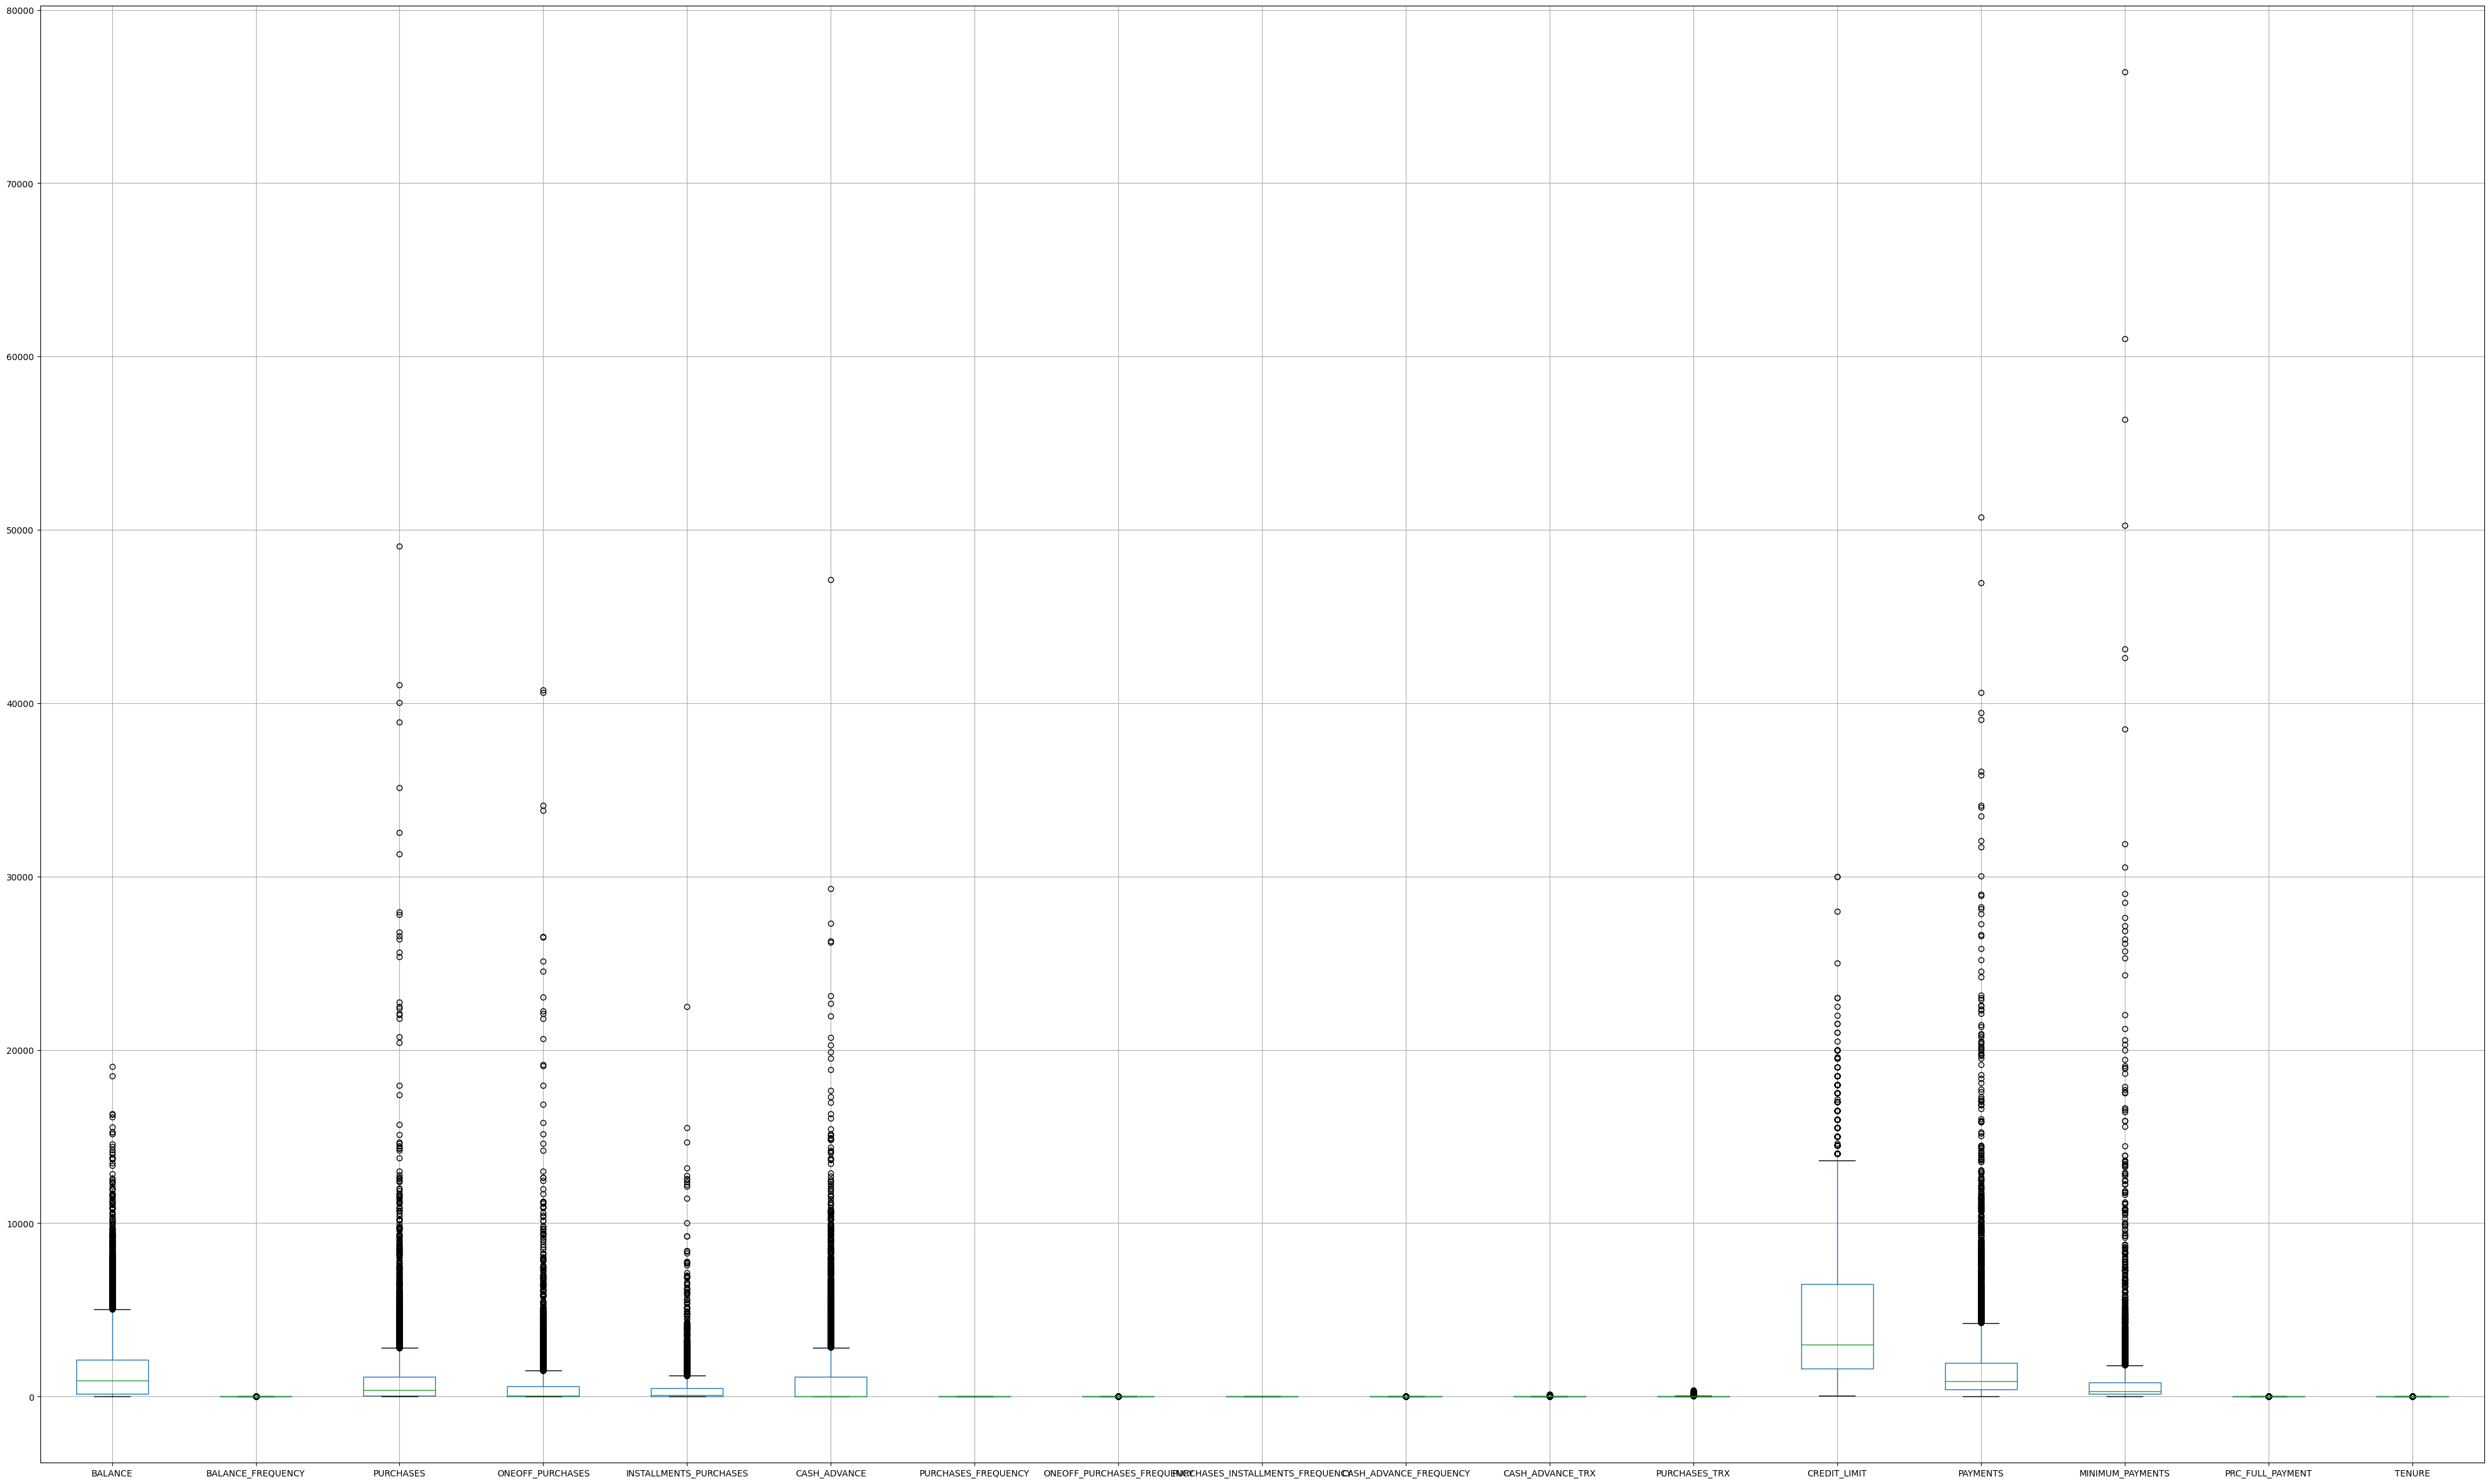

In [13]:
plt.figure(figsize=(50,30))
df.boxplot()
plt.show()

In [14]:
features = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

features.shape

(8636, 17)

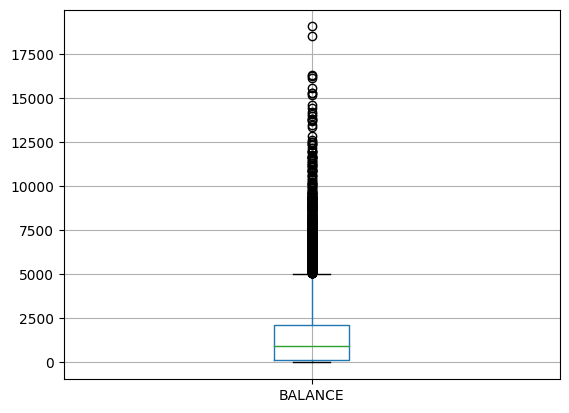

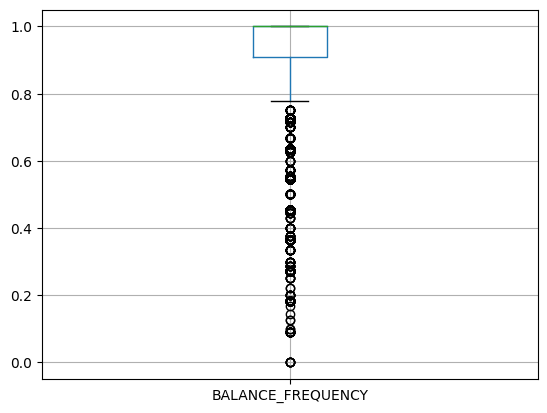

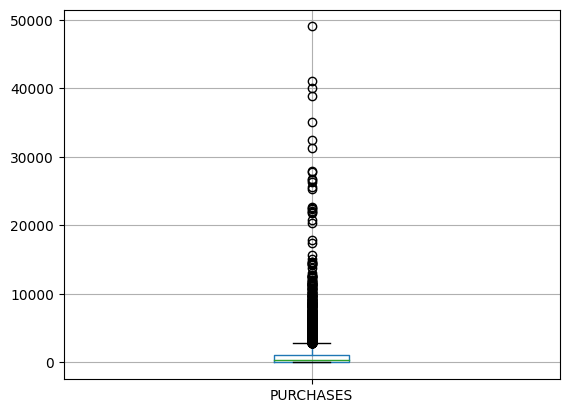

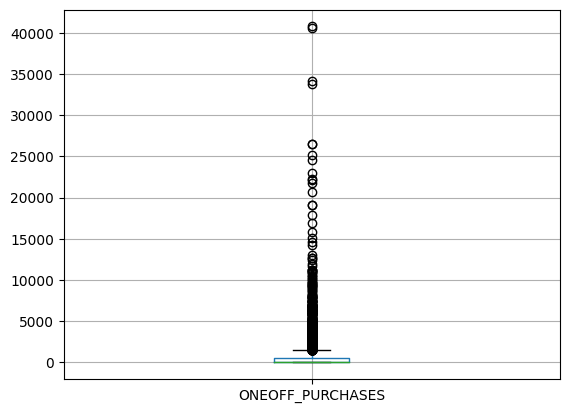

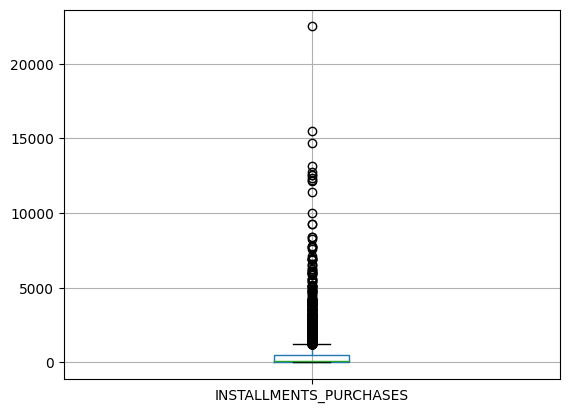

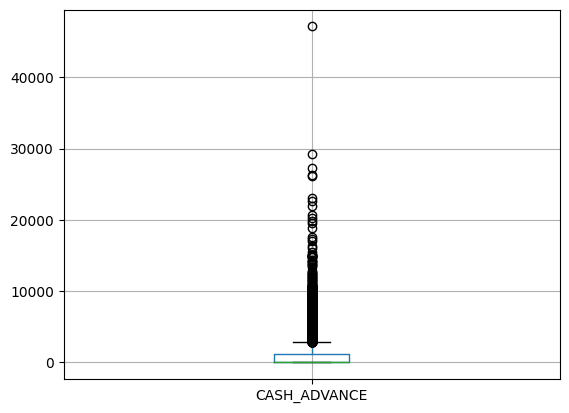

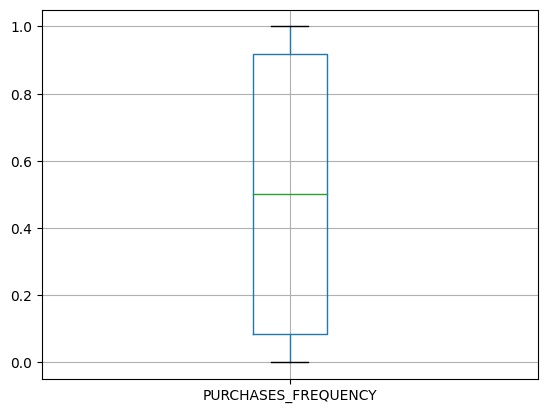

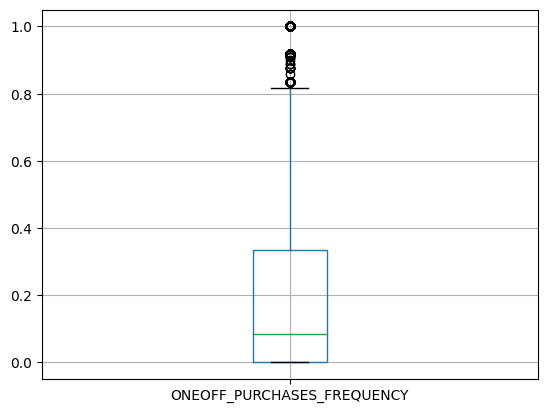

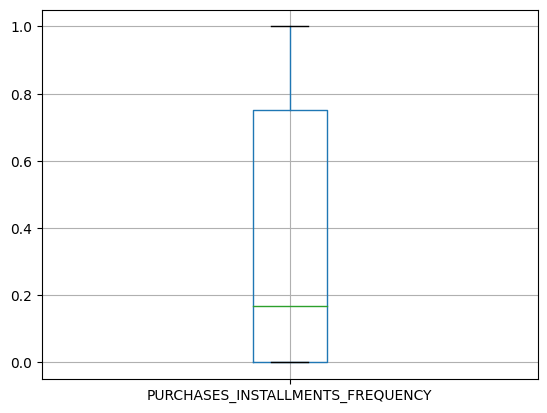

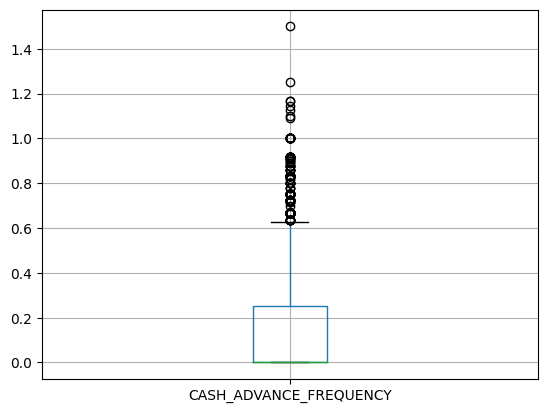

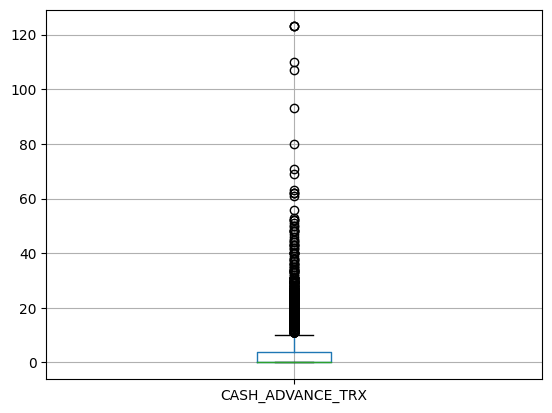

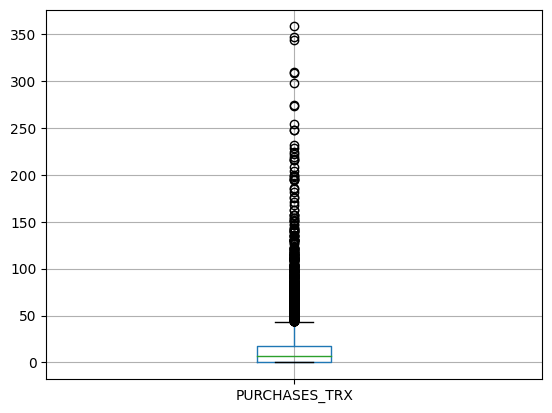

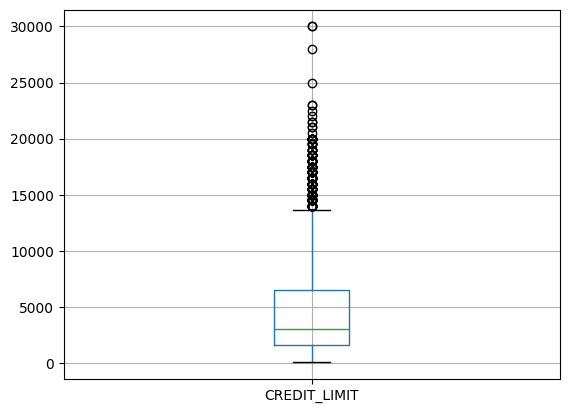

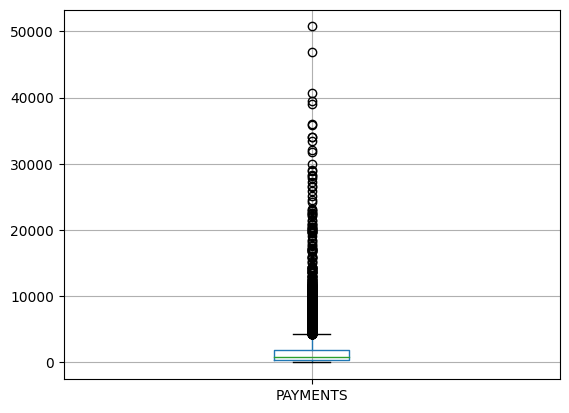

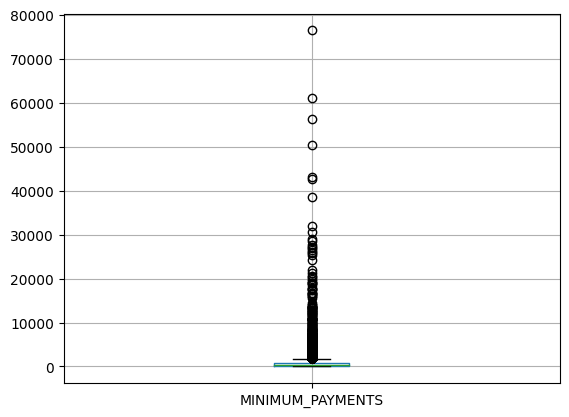

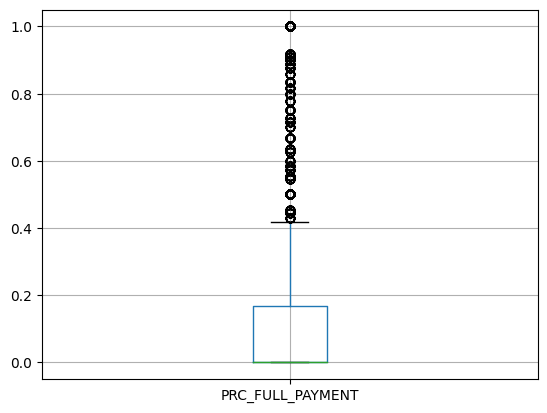

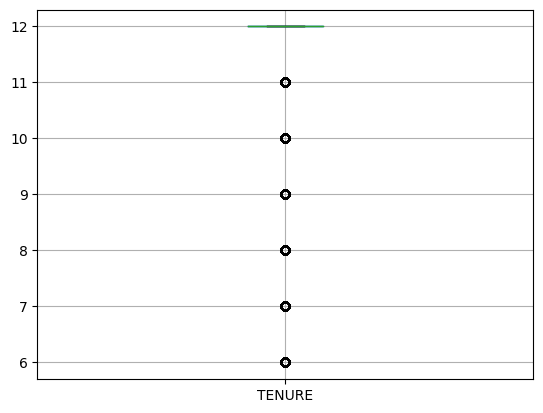

In [15]:
for i in features.columns:
    features.boxplot(i)
    plt.show()

In [16]:
scale = StandardScaler()
features_scaled = scale.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns= features.columns)

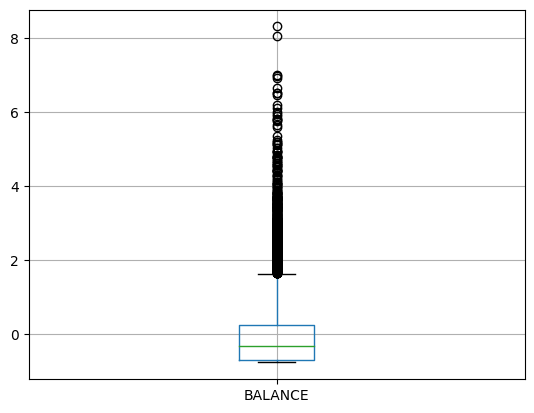

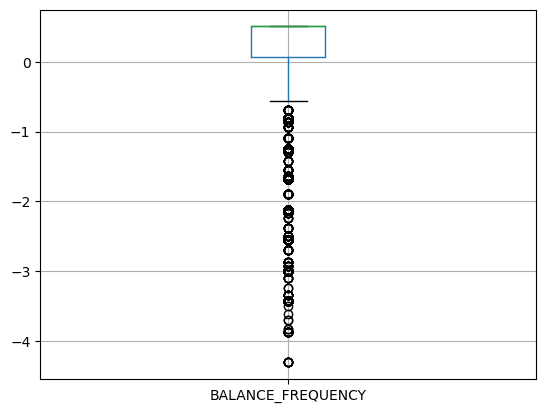

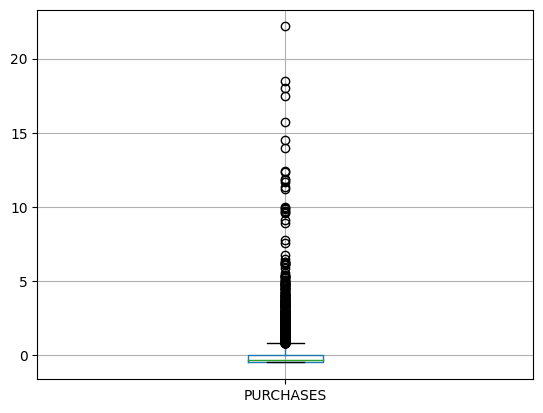

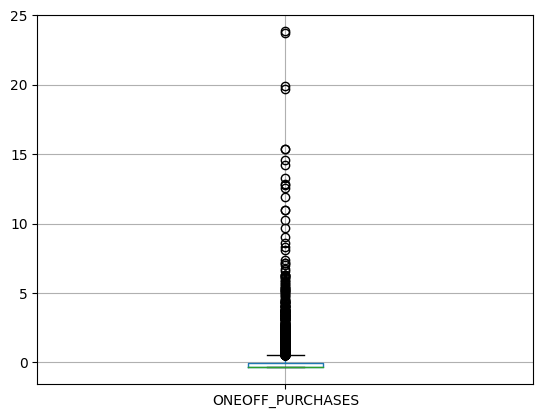

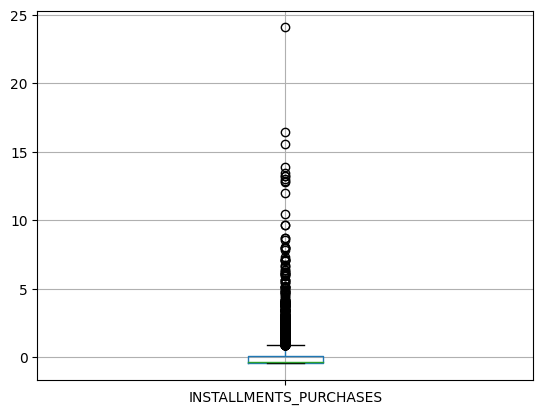

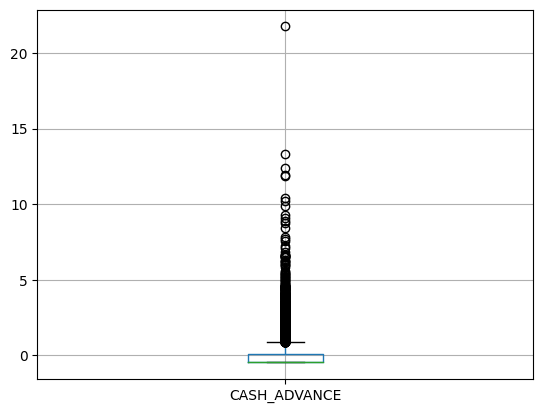

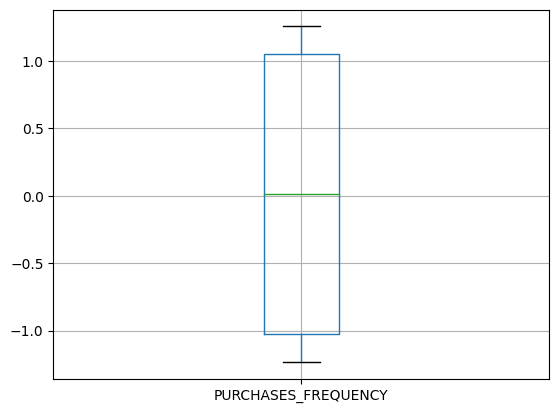

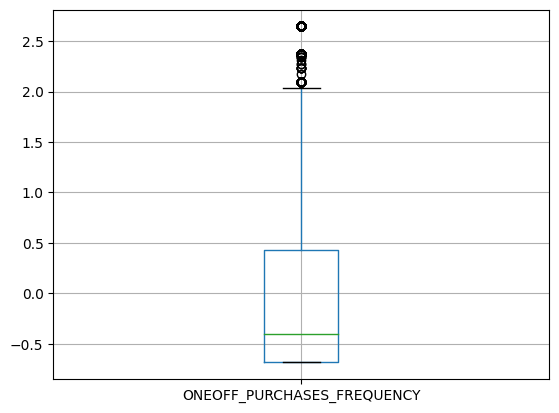

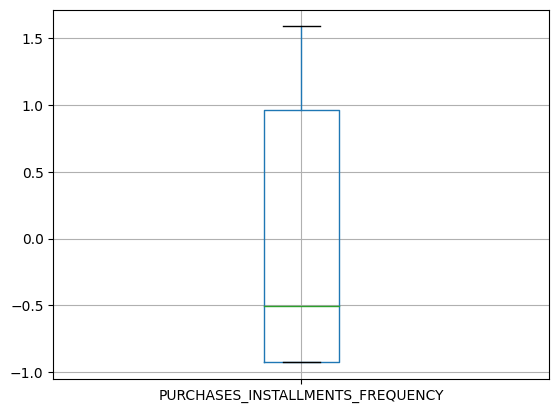

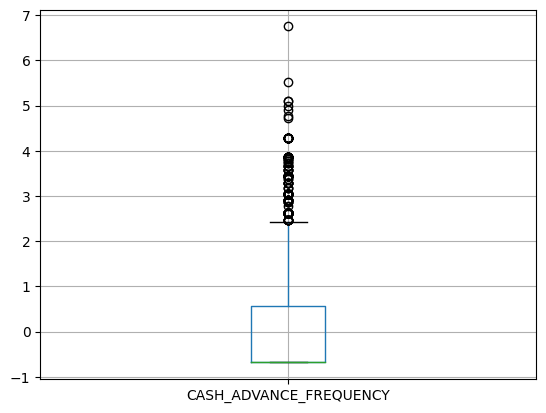

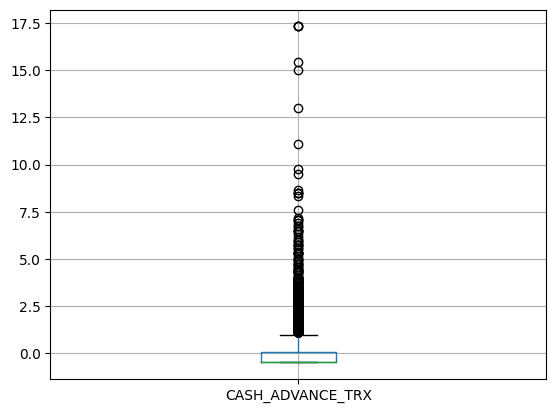

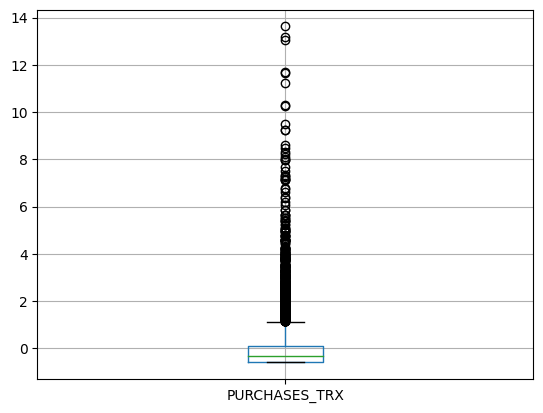

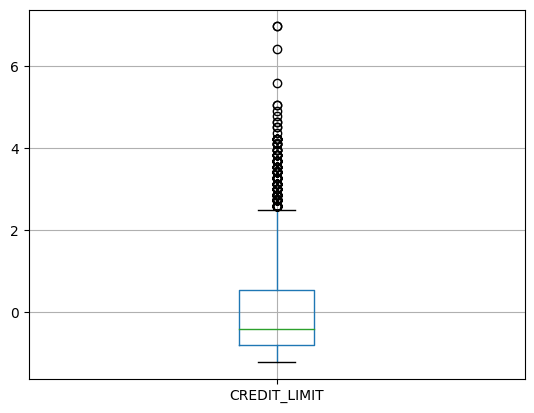

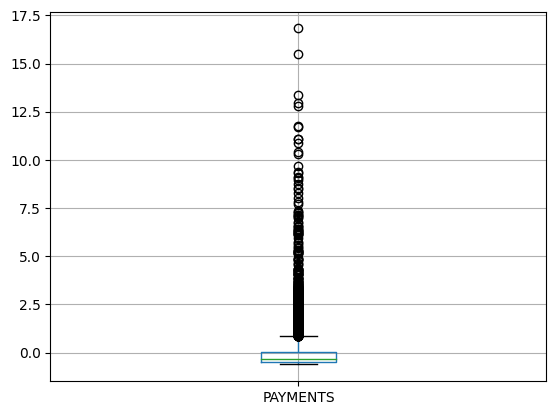

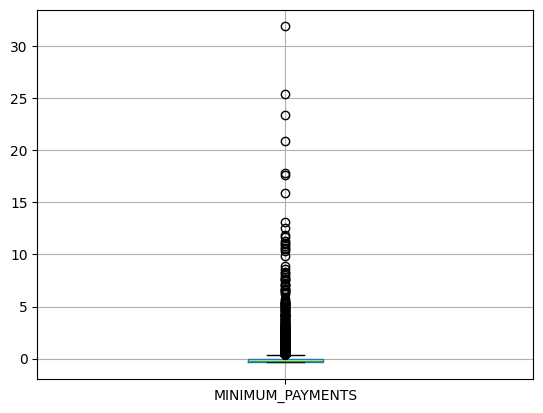

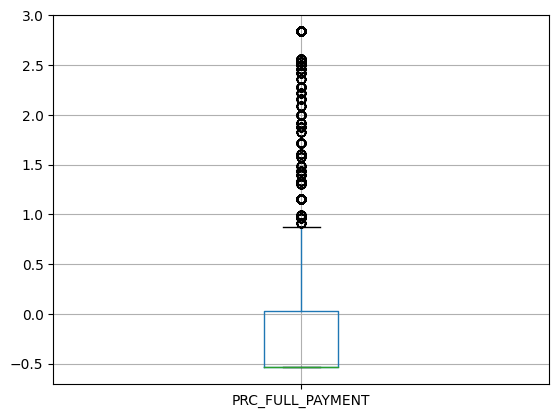

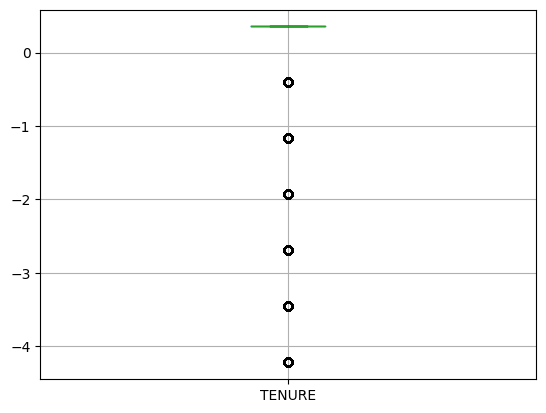

In [17]:
for i in features_scaled.columns:
    features_scaled.boxplot(i)
    plt.show()

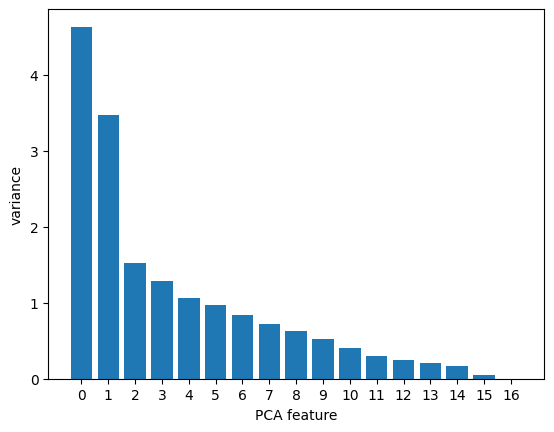

In [18]:
pca = PCA()
pca.fit(features_scaled)
number = range(pca.n_components_)
plt.bar(number, pca.explained_variance_)
plt.xticks(number)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [19]:
features_pca= PCA(2)
features_pca = pca.transform(features_scaled)

c:\Users\USER\anaconda3\envs\ypai07\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\anaconda3\envs\ypai07\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\anaconda3\envs\ypai07\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\anaconda3\envs\ypai07\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

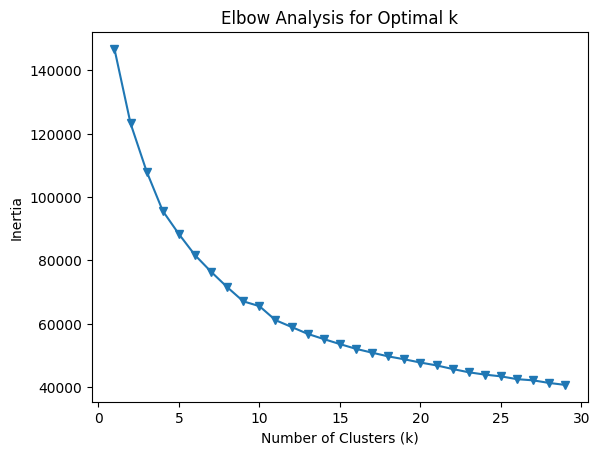

In [20]:
inertia = []
possible_k_values = range(1, 30)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

plt.plot(possible_k_values, inertia, marker = 'v')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Analysis for Optimal k')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features_pca)
cluster_label = kmeans.predict(features_pca)
print(cluster_label.shape)

c:\Users\USER\anaconda3\envs\ypai07\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(8636,)


In [22]:
df['Group'] = cluster_label

'BALANCE_FREQUENCY', 
 
'PURCHASES',

'ONEOFF_PURCHASES',        

'ONEOFF_PURCHASES_FREQUENCY',

'PURCHASES_INSTALLMENTS_FREQUENCY',

'CASH_ADVANCE_FREQUENCY',

'PURCHASES_TRX', 

'PAYMENTS',      

'PRC_FULL_PAYMENT', 

'TENURE'

In [23]:
df = df.drop(['CUST_ID'],axis=1)
group_1 = df[df['Group'] == 0]
group_2 = df[df['Group'] == 1]
group_3 = df[df['Group'] == 2]
group_4 = df[df['Group'] == 3]
group_5 = df[df['Group'] == 4]
group_6 = df[df['Group'] == 5]
group_7 = df[df['Group'] == 6]
group_8 = df[df['Group'] == 7]
group_9 = df[df['Group'] == 8]
group_10 = df[df['Group'] == 9]

In [24]:
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_15932\2717903591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['Group'] = 0


                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.128364   0.621537   
BALANCE_FREQUENCY                 0.128364           1.000000   0.110192   
PURCHASES                         0.621537           0.110192   1.000000   
ONEOFF_PURCHASES                  0.367544           0.031655   0.588456   
INSTALLMENTS_PURCHASES            0.553211           0.116851   0.891721   
CASH_ADVANCE                      0.346612           0.037798   0.009465   
PURCHASES_FREQUENCY               0.038240           0.734707   0.154674   
ONEOFF_PURCHASES_FREQUENCY        0.258885           0.060438   0.414857   
PURCHASES_INSTALLMENTS_FREQUENCY  0.023925           0.628363   0.103813   
CASH_ADVANCE_FREQUENCY            0.184101           0.031455   0.018341   
CASH_ADVANCE_TRX                  0.196571           0.039892   0.028176   
PURCHASES_TRX                     0.272673           0.298995   0.477394   
CREDIT_LIMIT

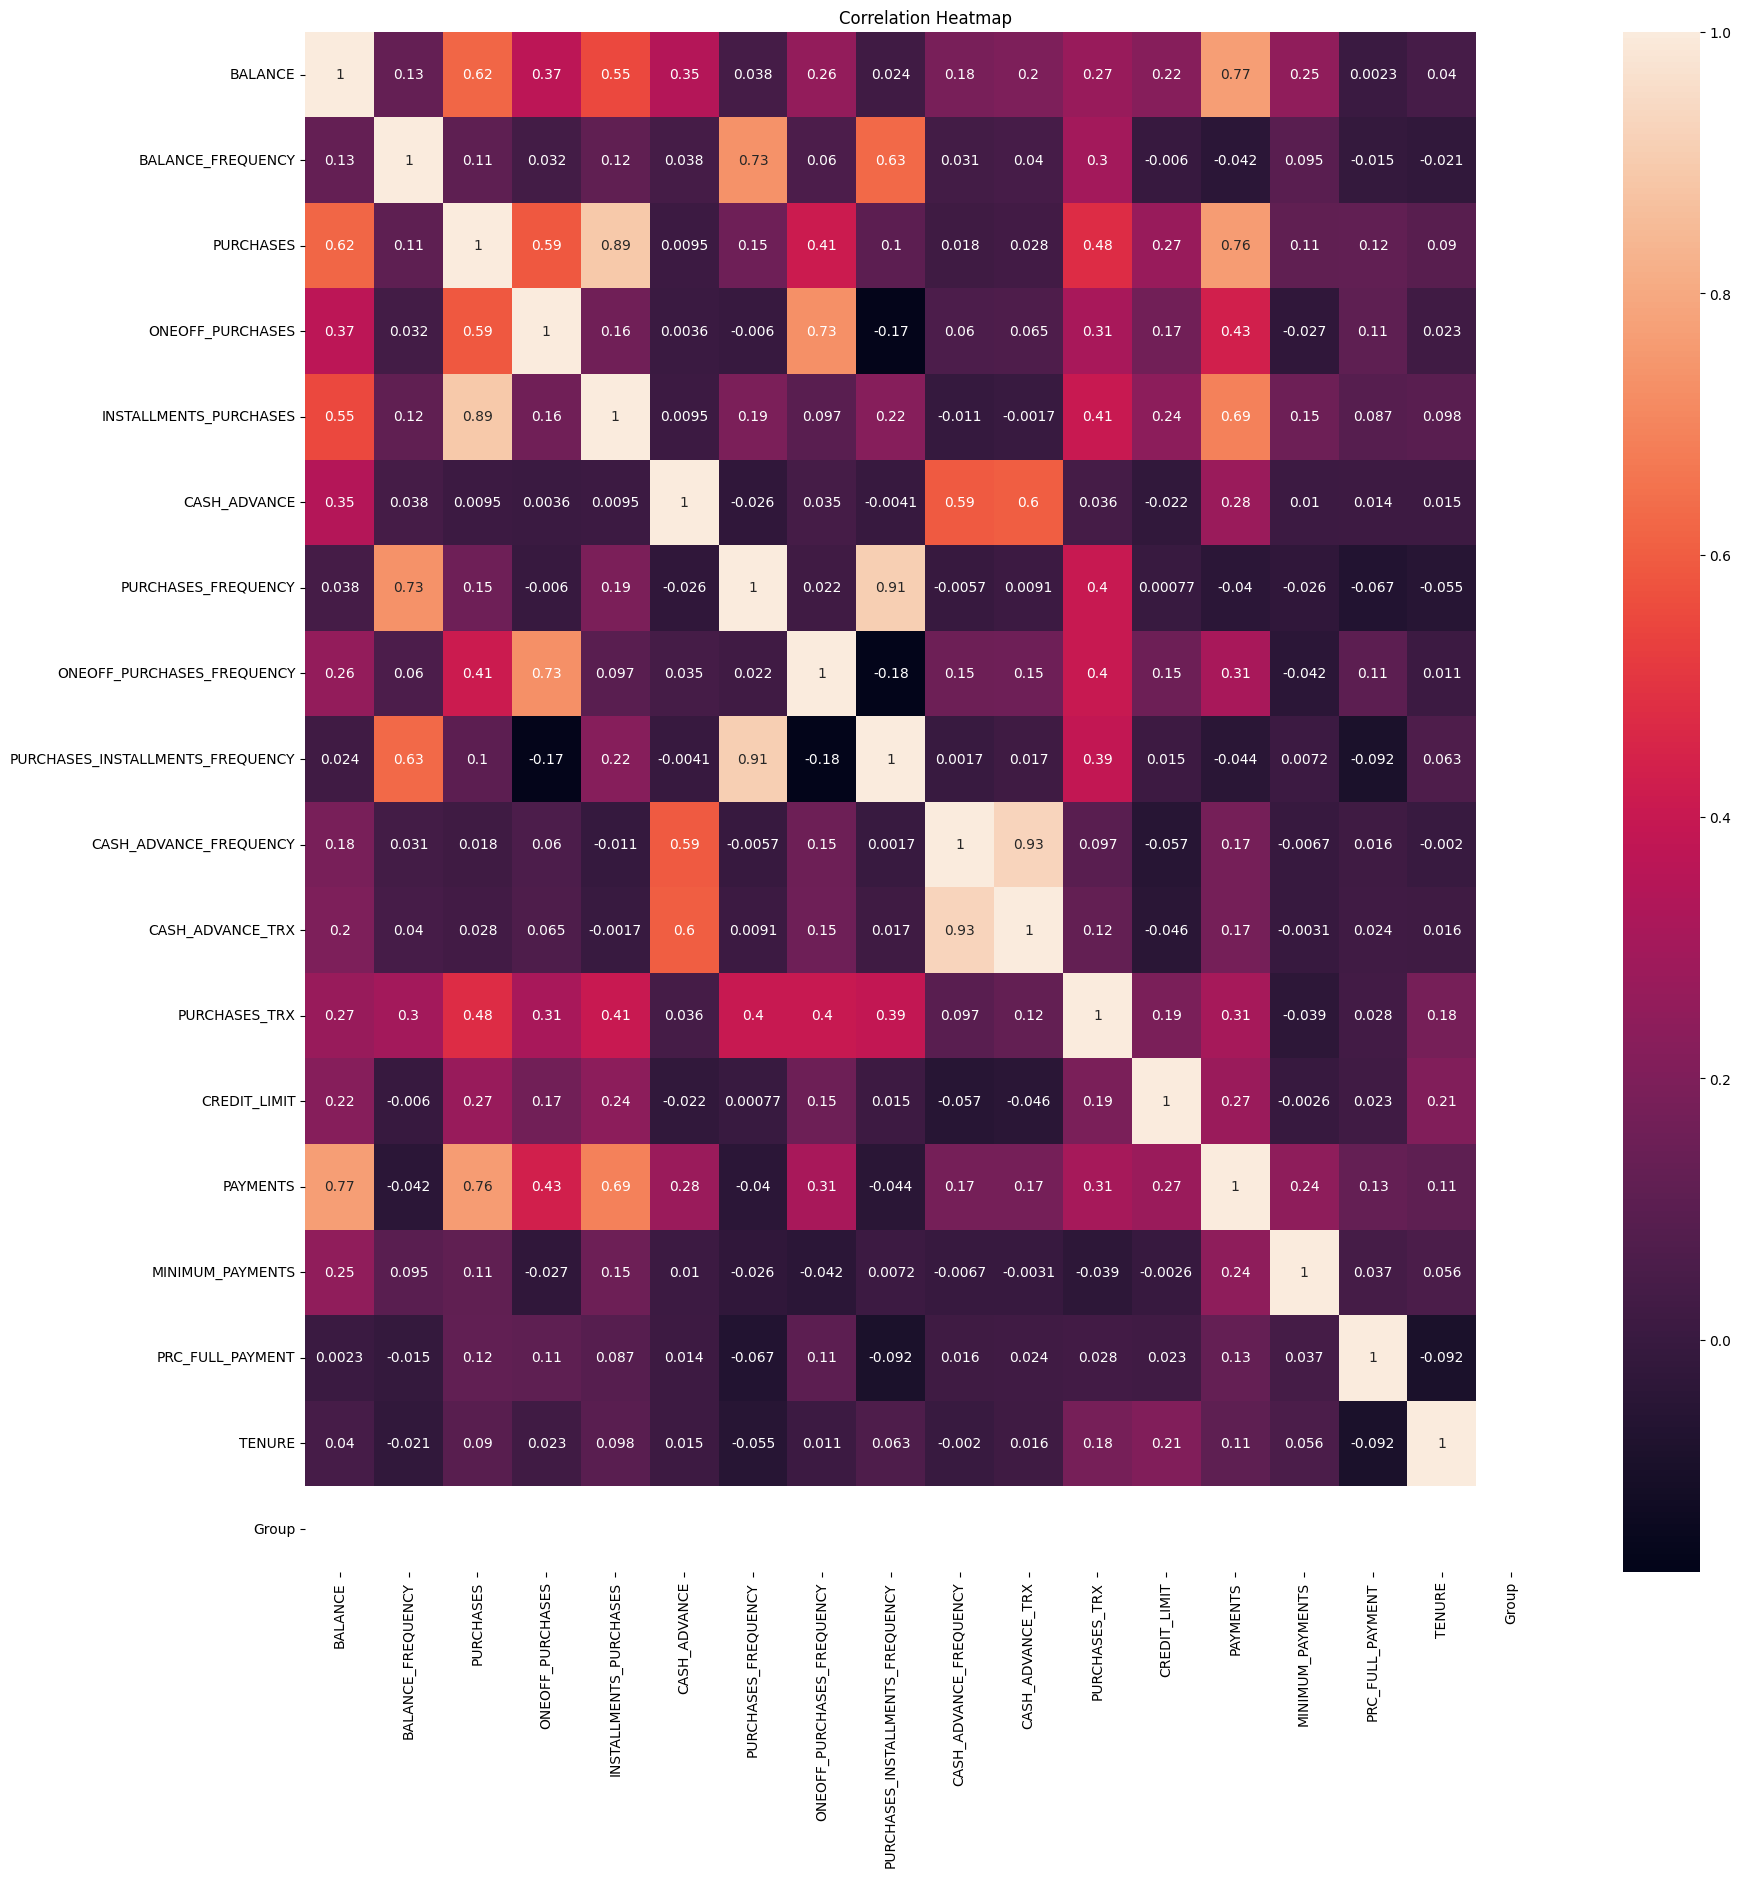

In [25]:
group_1['Group'] = 0
corr = group_1.corr()
print(corr)
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [27]:
group_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677 entries, 83 to 8908
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           677 non-null    float64
 1   BALANCE_FREQUENCY                 677 non-null    float64
 2   PURCHASES                         677 non-null    float64
 3   ONEOFF_PURCHASES                  677 non-null    float64
 4   INSTALLMENTS_PURCHASES            677 non-null    float64
 5   CASH_ADVANCE                      677 non-null    float64
 6   PURCHASES_FREQUENCY               677 non-null    float64
 7   ONEOFF_PURCHASES_FREQUENCY        677 non-null    float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  677 non-null    float64
 9   CASH_ADVANCE_FREQUENCY            677 non-null    float64
 10  CASH_ADVANCE_TRX                  677 non-null    int64  
 11  PURCHASES_TRX                     677 non-null    int64  
 12  CREDIT_LIMI

In [28]:
group_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.0
mean,99.525571,0.908781,980.912733,166.212511,814.831654,22.095784,0.864505,0.082874,0.804972,0.003795,0.063516,17.550960,3963.666577,1084.580415,188.428423,0.769890,11.689808,0.0
std,128.408262,0.134914,864.424937,396.194700,707.837663,319.479376,0.171925,0.164235,0.219335,0.030512,0.648472,12.616058,3096.659639,1121.396485,289.685443,0.204674,0.897778,0.0
min,1.533981,0.454545,70.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,3.000000,300.000000,78.092423,34.928987,0.333333,7.000000,0.0
25%,31.934855,0.818182,388.440000,0.000000,318.000000,0.000000,0.750000,0.000000,0.666667,0.000000,0.000000,10.000000,1700.000000,403.594309,139.860070,0.600000,12.000000,0.0
50%,64.031010,1.000000,705.840000,0.000000,573.020000,0.000000,1.000000,0.000000,0.888889,0.000000,0.000000,12.000000,3000.000000,758.421856,162.175915,0.800000,12.000000,0.0
75%,122.124272,1.000000,1267.000000,108.320000,1086.260000,0.000000,1.000000,0.083333,1.000000,0.000000,0.000000,21.000000,5000.000000,1353.493400,176.526370,1.000000,12.000000,0.0
max,1565.982050,1.000000,5446.880000,3466.220000,4538.840000,7663.906258,1.000000,1.000000,1.000000,0.500000,14.000000,88.000000,21500.000000,12020.180090,4553.156050,1.000000,12.000000,0.0


In [29]:
group_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.0
mean,4600.423767,0.977678,347.968379,222.097261,125.973505,3432.526776,0.228622,0.104576,0.141636,0.436049,11.370594,5.206445,7376.943147,2381.071141,2142.959875,0.020815,11.699899,1.0
std,2660.673655,0.073336,612.638834,481.043087,316.496495,2086.540209,0.313907,0.184368,0.268431,0.215111,7.243714,9.345555,3601.437075,2027.819597,4273.053679,0.072496,0.853462,0.0
min,51.422178,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,46.969049,16.950090,0.000000,6.000000,1.0
25%,2613.063331,1.000000,0.000000,0.000000,0.000000,1935.422714,0.000000,0.000000,0.000000,0.250000,6.000000,0.000000,5000.000000,1129.128267,784.754790,0.000000,12.000000,1.0
50%,4228.711030,1.000000,17.300000,0.000000,0.000000,3134.266150,0.083333,0.000000,0.000000,0.416667,10.000000,1.000000,7000.000000,1691.047119,1339.173048,0.000000,12.000000,1.0
75%,6074.986862,1.000000,453.120000,219.070000,79.000000,4516.162598,0.416667,0.166667,0.166667,0.583333,15.000000,7.000000,9500.000000,2949.673416,2077.873573,0.000000,12.000000,1.0
max,16115.596400,1.000000,4400.000000,4020.040000,4059.930000,11657.312440,1.000000,1.000000,1.000000,1.500000,48.000000,69.000000,21500.000000,12124.639570,61031.618600,0.916667,12.000000,1.0


                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.128364   0.621537   
BALANCE_FREQUENCY                 0.128364           1.000000   0.110192   
PURCHASES                         0.621537           0.110192   1.000000   
ONEOFF_PURCHASES                  0.367544           0.031655   0.588456   
INSTALLMENTS_PURCHASES            0.553211           0.116851   0.891721   
CASH_ADVANCE                      0.346612           0.037798   0.009465   
PURCHASES_FREQUENCY               0.038240           0.734707   0.154674   
ONEOFF_PURCHASES_FREQUENCY        0.258885           0.060438   0.414857   
PURCHASES_INSTALLMENTS_FREQUENCY  0.023925           0.628363   0.103813   
CASH_ADVANCE_FREQUENCY            0.184101           0.031455   0.018341   
CASH_ADVANCE_TRX                  0.196571           0.039892   0.028176   
PURCHASES_TRX                     0.272673           0.298995   0.477394   
CREDIT_LIMIT

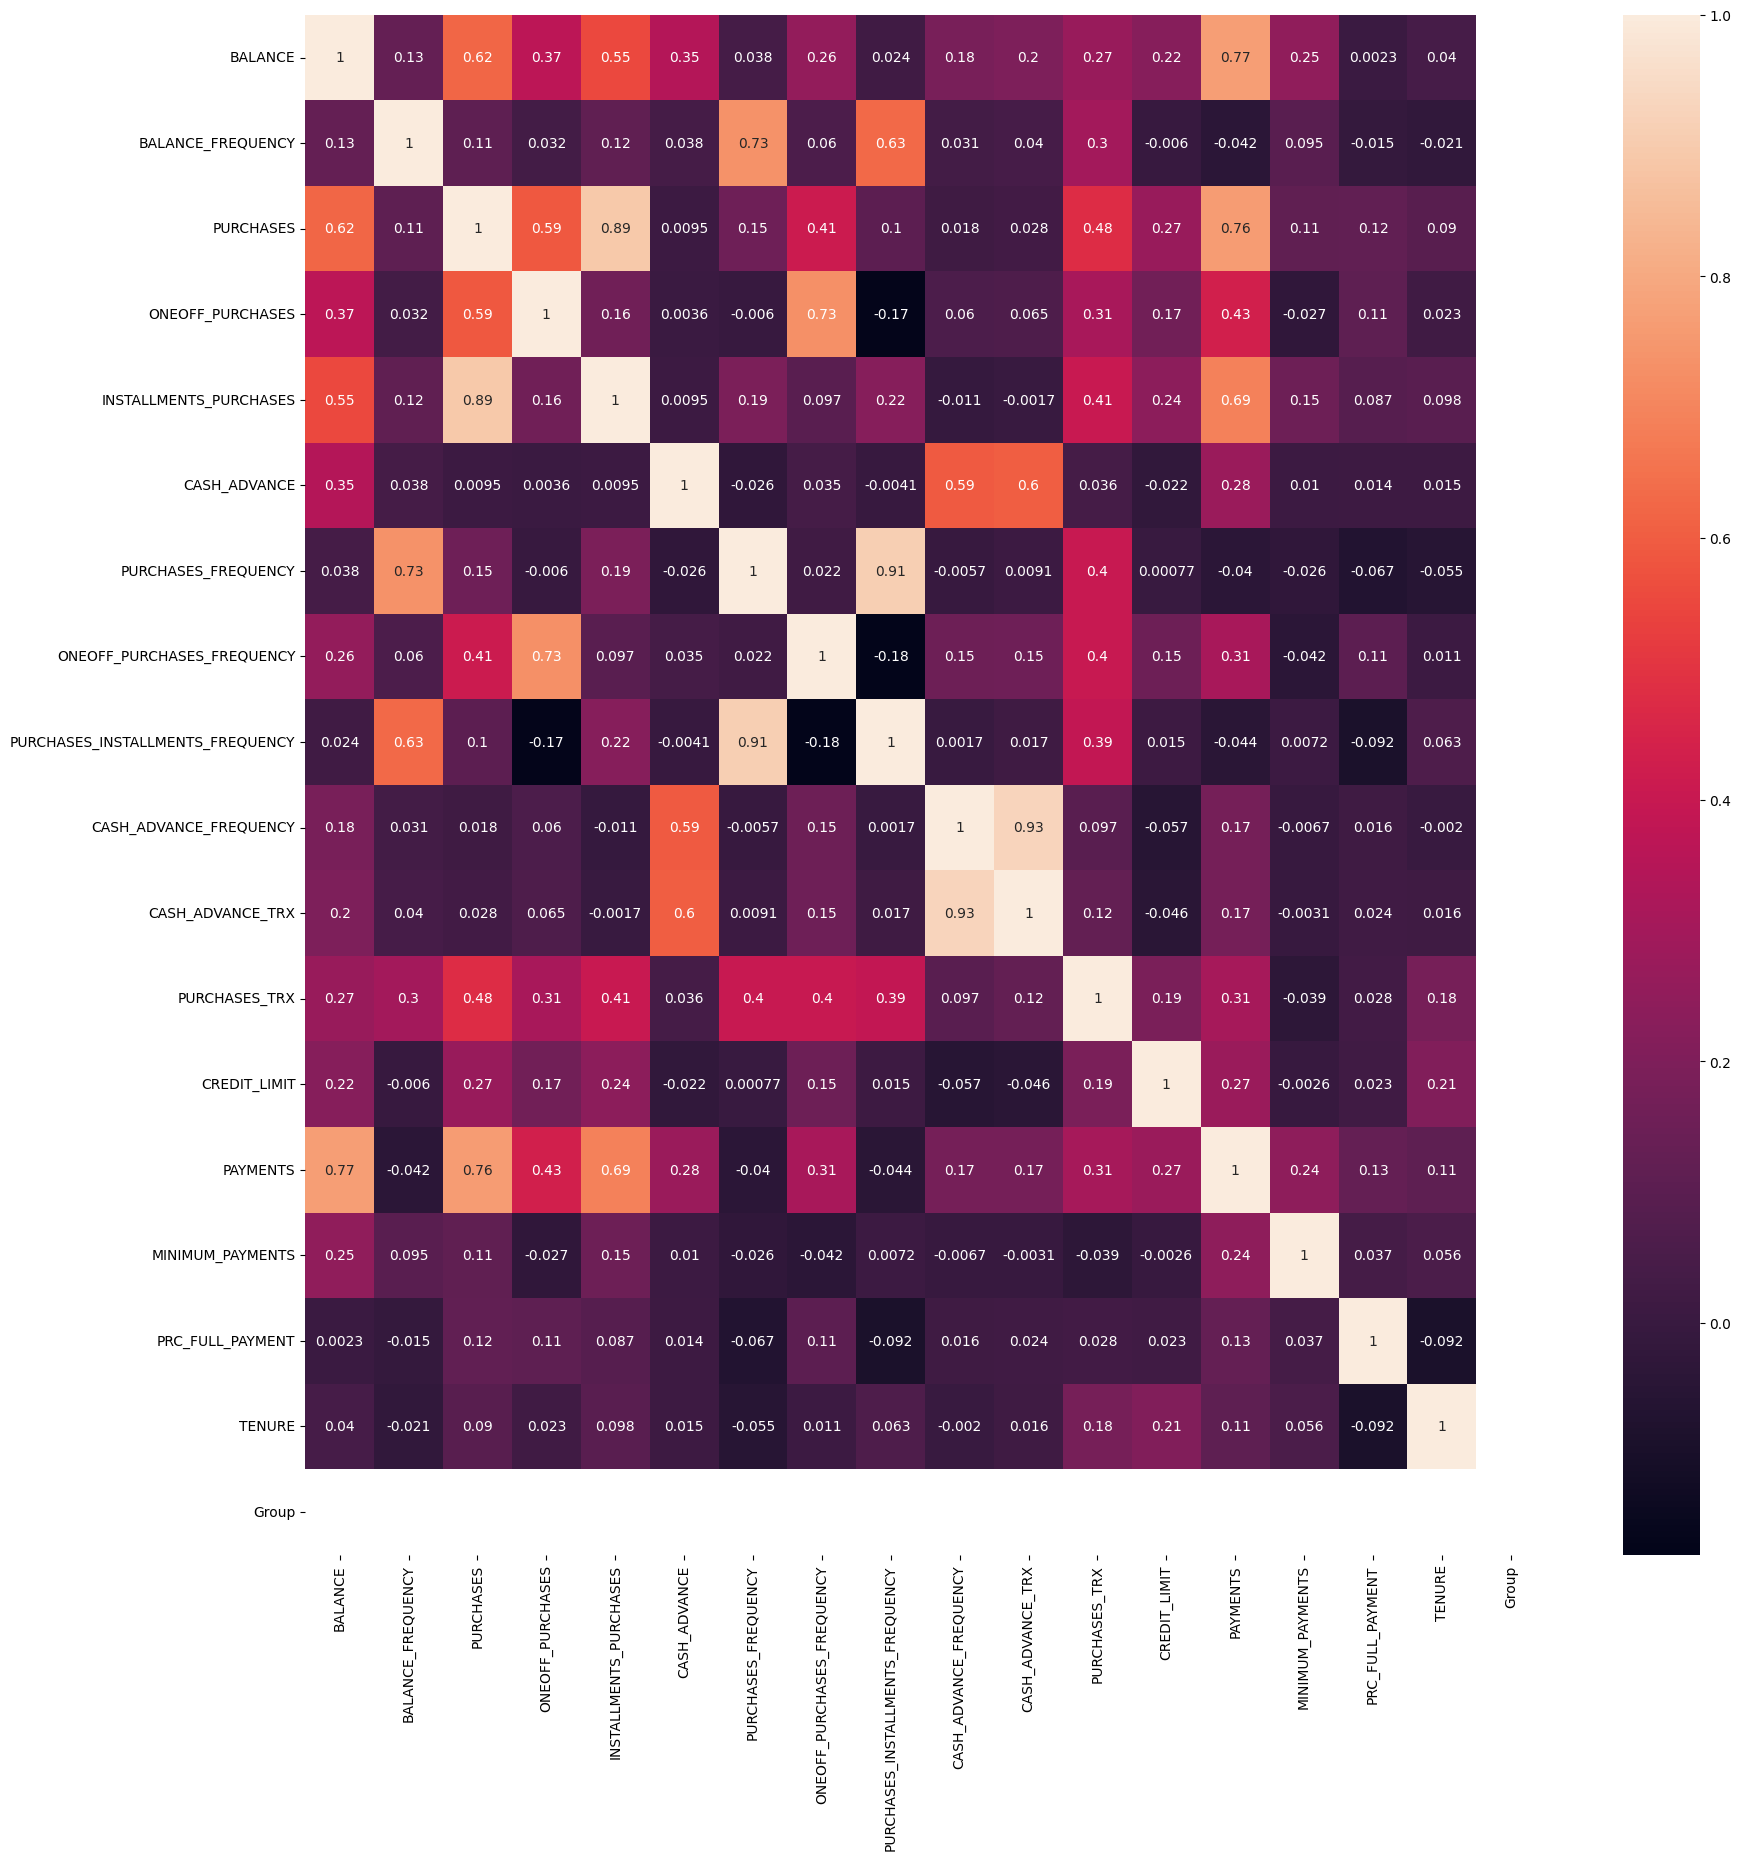

In [32]:
plt.figure(figsize=(20,20))
corr_1 = group_1.corr()
print(corr_1)
sns.heatmap(corr_1, annot= True)
plt.show()